# Metrics
* 

## imports

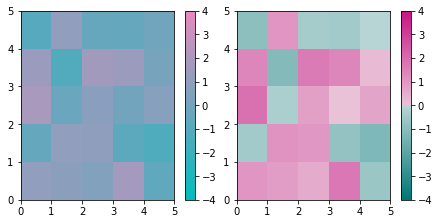

In [38]:
import colour
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

import numpy as np
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

from itertools import cycle
from sklearn.metrics import auc, roc_curve


## data

In [39]:
y_true = np.array([0, 0, 1, 1, 1, 1])
y_scores = np.array([0.1, 0.4, 0.3, 0.7, 0.85, 0.8])

## prec rec

[0.66666667 0.8        0.75       1.         1.         1.
 1.        ]
[1.   1.   0.75 0.75 0.5  0.25 0.  ]


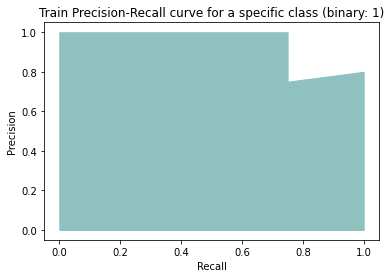

In [40]:
# When an image is over-segmented, the precision value is large but the recall value decrease to incur the penalty. 


precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

print(precision)
print(recall)

#precision
#recall
#thresholds
# 190, 140, 256
plt.fill_between(recall, precision, color=colour.blue_light)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve for a specific class (binary: 1)");

## prec rec

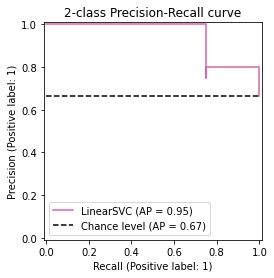

In [41]:
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_predictions(
    y_true, y_scores, name="LinearSVC", plot_chance_level=True, color= colour.red_dark
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

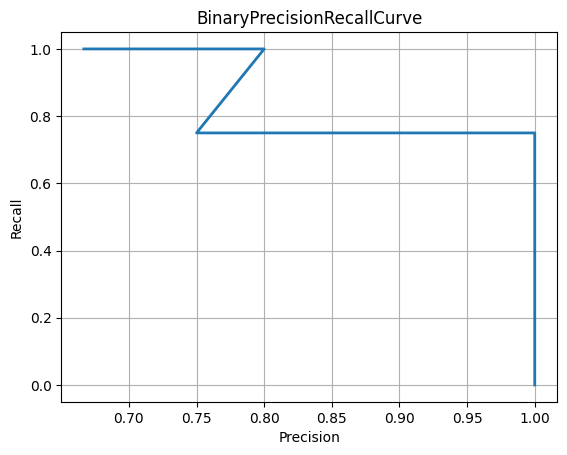

In [53]:
from torch import rand, randint, tensor
from torchmetrics.classification import BinaryPrecisionRecallCurve
preds = rand(20)
target = randint(2, (20,))
metric = BinaryPrecisionRecallCurve()
metric.update(preds=tensor(y_scores), target=tensor(y_true))
fig_, ax_ = metric.plot(score=True)

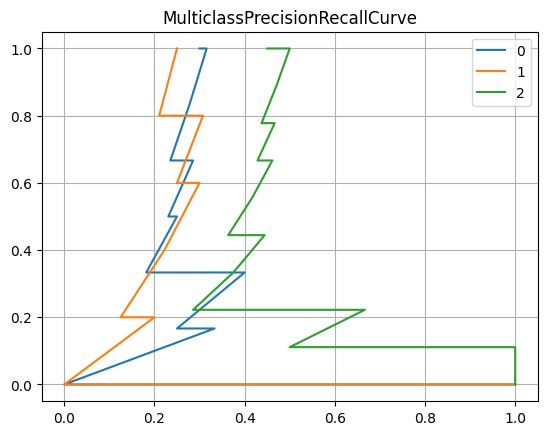

In [59]:
from torch import randn, randint
from torchmetrics.classification import MulticlassPrecisionRecallCurve
preds = randn(20, 3).softmax(dim=-1)
target = randint(3, (20,))
metric = MulticlassPrecisionRecallCurve(num_classes=3)
metric.update(preds, target)
fig_, ax_ = metric.plot(score=True)

## roc auc

Micro-averaged One-vs-Rest ROC AUC score:
0.88


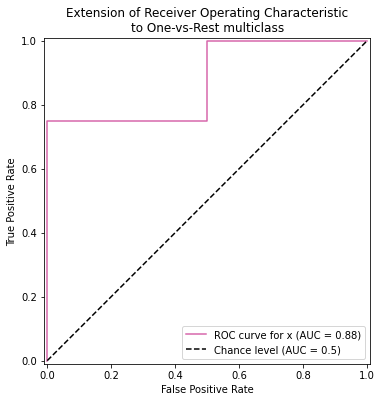

In [20]:

fig, ax = plt.subplots(figsize=(6, 6))



# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_scores.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

"""
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)
"""

"""
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)
"""

colors = cycle([colour.red_dark, colour.red_light, colour.blue_dark])
for class_id, color in zip(range(1), colors):
    RocCurveDisplay.from_predictions(
        y_true[:],
        y_scores[:],
        name=f"ROC curve for x",
        color=color,
        ax=ax,
        plot_chance_level=(class_id == 0),
    )

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
)

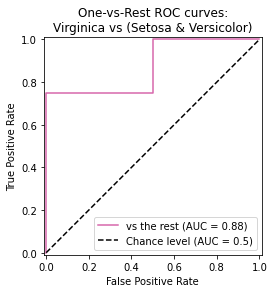

In [21]:

class_id = 0

display = RocCurveDisplay.from_predictions(
    y_true[:],
    y_scores[:],
    name=f"vs the rest",
    color=colour.red_dark,
    # chance_level_=True,
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)",
)

## normal scores

In [29]:
from sklearn.metrics import f1_score
from torch import tensor
from torchmetrics.classification import MulticlassF1Score
target = tensor([2, 1, 0, 0])
preds = tensor([2, 1, 0, 1])


### F1

In [30]:
metric = MulticlassF1Score(num_classes=3)
metric(preds, target)

tensor(0.7778)

In [31]:
f1_score(y_true=target, y_pred=preds, average="macro") # average{‘micro’, ‘macro’, ‘samples’, ‘weighted’, ‘binary’}

0.7777777777777777

In [32]:
metric = MulticlassF1Score(num_classes=3, average="micro")
metric(preds, target)

tensor(0.7500)

In [33]:
f1_score(y_true=target, y_pred=preds, average="micro") # average{‘micro’, ‘macro’, ‘samples’, ‘weighted’, ‘binary’}

0.75

In [34]:
mcf1s = MulticlassF1Score(num_classes=3, average=None)
mcf1s(preds, target)

tensor([0.6667, 0.6667, 1.0000])

In [36]:
f1_score(y_true=target, y_pred=preds, average=None) # average{‘micro’, ‘macro’, ‘samples’, ‘weighted’, ‘binary’}

array([0.66666667, 0.66666667, 1.        ])

# Confusion matrix

## imports

In [22]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
import colour

## data

In [23]:
y_true = np.array([0, 0, 1, 1, 1, 1, 2, 0, 0, 2])
y_scores = np.array([0, 2, 1, 1, 2, 1, 0, 1, 1, 1]) # needs argmax value

print(np.unique(y_true))


[0 1 2]






"""
cm = confusion_matrix(y_true, y_scores, labels=np.unique(y_true))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.unique(y_true),
                              cmap="variint_map_b")
"""

cm = confusion_matrix(y_true, y_scores, labels=np.unique(y_true))
print(cm)

ConfusionMatrixDisplay.from_predictions(y_true, y_scores, labels=np.unique(y_true),cmap=colour.variint_map_1.reversed())
plt.show()

# explainability - captum
* tcav - https://github.com/pytorch/captum/blob/master/tutorials/TCAV_Image.ipynb
* https://captum.ai/api/index.html

# uncertainty - important samples

# adversarial attacks - robustness